## Bookify: The Ultimate Book Recommendation Application With Data-Driven Intelligence

### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
books = pd.read_csv('Dataset/Books.csv')
users = pd.read_csv('Dataset/Users.csv')
ratings = pd.read_csv('Dataset/Ratings.csv')

In [4]:
pd.set_option('display.max_colwidth', -1)

### Books Data

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


### Users Data

In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Ratings Data

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Checking the dimensions of the datasets

print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Data preprocessing

#### 1. Books Dataset Pre-processing

In [9]:
# Checking for null values

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# Checking for duplicates

books.duplicated().sum()

0

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
# getting no.of unique value from 'Book-Author' feature

books['Book-Author'].nunique()

102023

In [13]:
# getting no.of unique value from 'Publisher' feature

books['Publisher'].nunique()

16807

In [14]:
# getting no.of unique value from 'ISBN' feature

books['ISBN'].nunique()

271360

In [15]:
# getting no.of unique value from 'Year-Of-Publication' feature

books['Year-Of-Publication'].nunique()

202

In [16]:
# getting unique value from 'Year-Of-Publication' feature

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
# from above we can observe that 'DK Publishing Inc','Gallimard' have been placed in incorrect column

books[books['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [18]:
# Thus we shift the respective rows and place them in the right columns

books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books.at[209538 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.at[209538 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.at[209538 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'
books.at[221678 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.at[221678 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.at[221678 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.at[220731 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.at[220731 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.at[220731 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'

In [19]:
# changing dtype of year of publication

books['Year-Of-Publication']=books['Year-Of-Publication'].astype(int)

In [20]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
# something is off about years of publication like:

books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [22]:
# replacing with correct  values

books.loc[books.ISBN=='9643112136','Year-Of-Publication'] = 2010
books.loc[books.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [23]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.

books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN


In [24]:
# replacing NaN values with mode value of Year-Of-Publication

books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].mode()[0], inplace=True)

In [25]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [26]:
# Checking  for  null value in book author

books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [27]:
books['Book-Author'].fillna('Not mentioned', inplace=True)

In [28]:
# Checking  for  null value in book author

books[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [29]:
books['Publisher'].fillna('Not mentioned', inplace=True)

In [30]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

#### 2. Users Dataset Pre-processing

In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [32]:
users.duplicated().sum()

0

In [33]:
# Checking null values

users.isna().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [34]:
# checking percentage of null values

users.isnull().sum()/len(users)*100

User-ID     0.000000 
Location    0.000000 
Age         39.719857
dtype: float64

In [35]:
# summarizing data in 'Age' column

users['Age'].describe()

count    168096.000000
mean     34.751434    
std      14.428097    
min      0.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      244.000000   
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

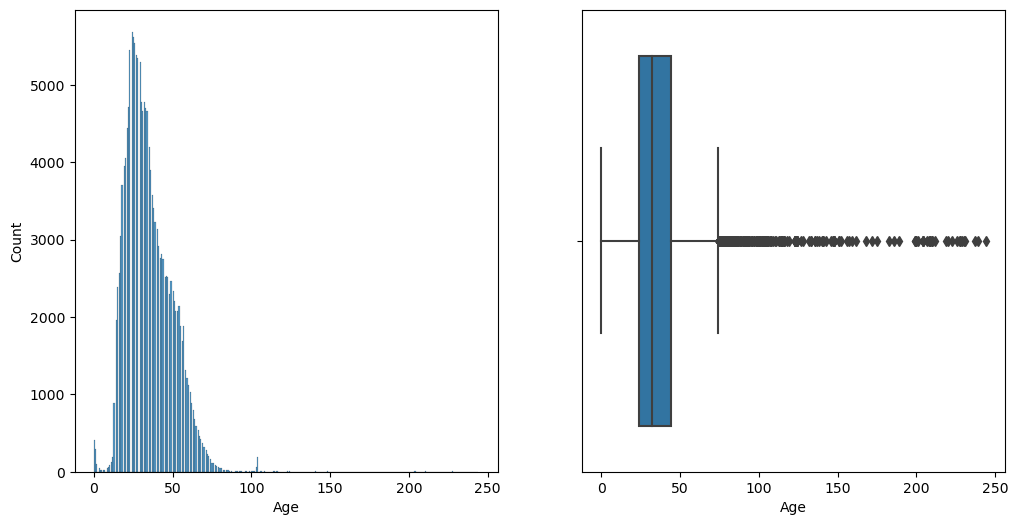

In [36]:
#Histogram showing distribution of ages

fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)



# boxplot of Age column

plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

    Most of the users are from the age group 25-50
    
    It is highly unlikely to have users under the age of 4 and above 100. In this case they are the outliers so let's         replace these values with np.nan

In [37]:
# Handling outliers

users.loc[(users['Age'] > 100) | (users['Age'] < 5),'Age'] = np.nan

In [38]:
users['Age'].fillna(users['Age'].mode()[0], inplace=True)

In [39]:
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [40]:
#changing datatype to int

users['Age'] = users['Age'].astype(int)       

#### 3. Ratings Dataset Pre-processing

In [41]:
ratings.duplicated().sum()

0

In [42]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [43]:
# Checking null values

ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [44]:
# Checking unique values in the 'Book-Rating' feature

ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

### Exporting cleaned data

In [45]:
users.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_users.csv', index=False)
books.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_books.csv', index=False)
ratings.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_ratings.csv', index=False)

## Data Visualization and Analysis

## 1. Books dataset

### Analysis no. 1 - Author with highest no.of books

In [46]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


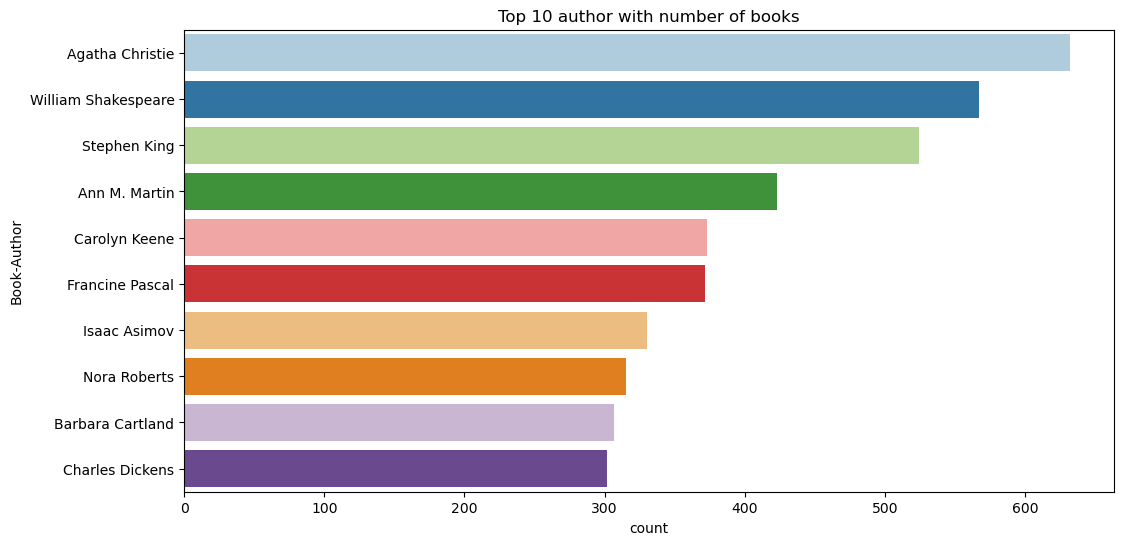

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=books,order=books['Book-Author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")
plt.show()

    Agatha Christie is leading at top with more than 600  counts  as  she  has most  number  of books written as compared to  others, followed by William Shakespeare.

### Analysis no. 2 - Top publishers

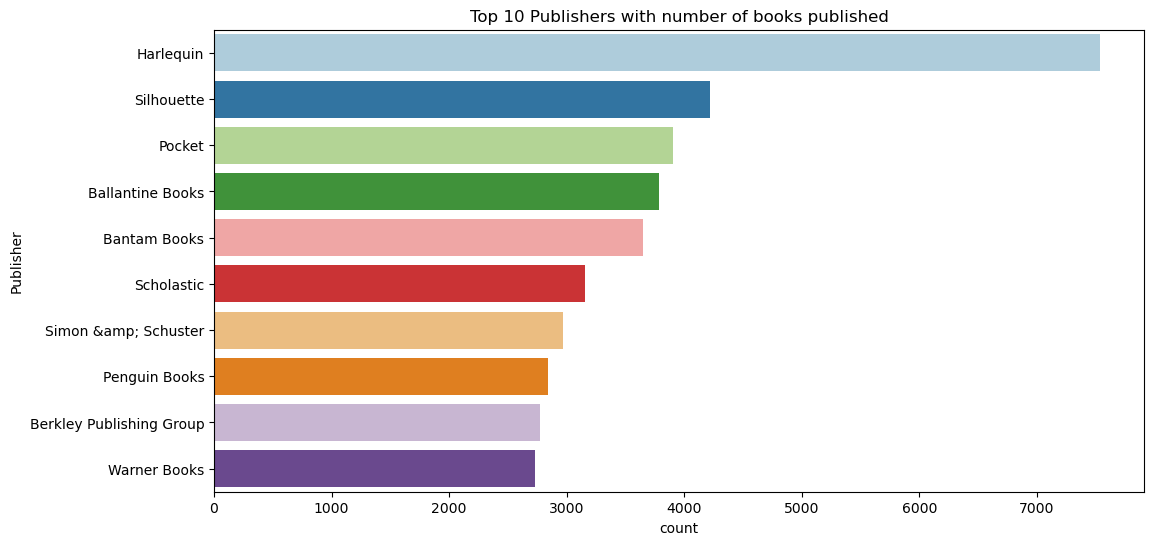

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=books,order=books['Publisher'].value_counts().index[0:10])
plt.title("Top 10 Publishers with number of books published")
plt.show()

    Harlequin has most number of books published, followed by Silhouette. 

### Analysis no.3 - Number of Books published on yearly basis

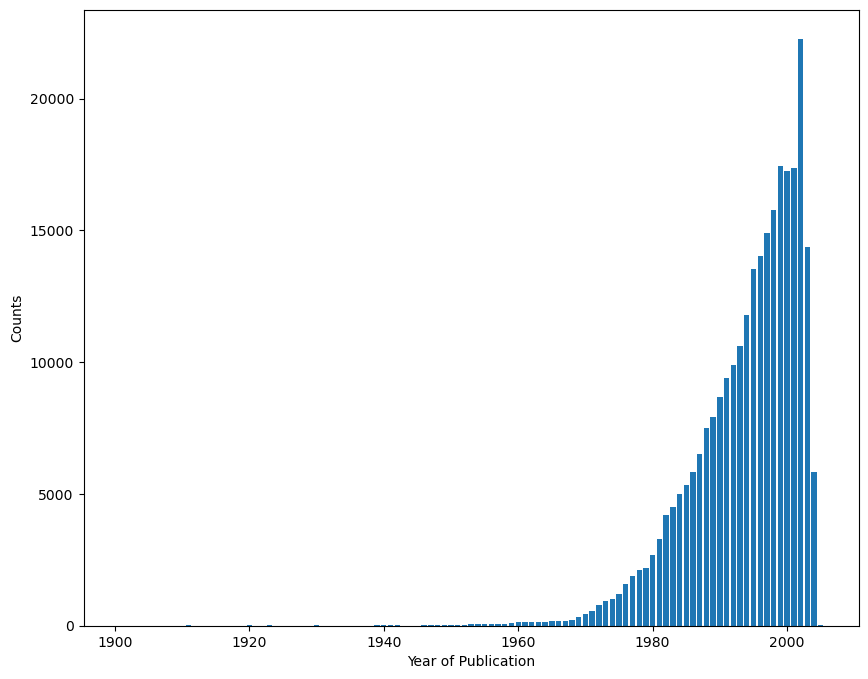

In [49]:
year = books['Year-Of-Publication'].value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('Counts')
plt.show()

    Most no.of books were published in the year 2002

    The book industry boomed from 1980's and it was at its peak around the  year  2000,  it might because people started to understand the importance of books and gradually started to implement productive habits in their life.

## 2. Users data Dataset

### Analysis no.4 - Age wise distributions of users

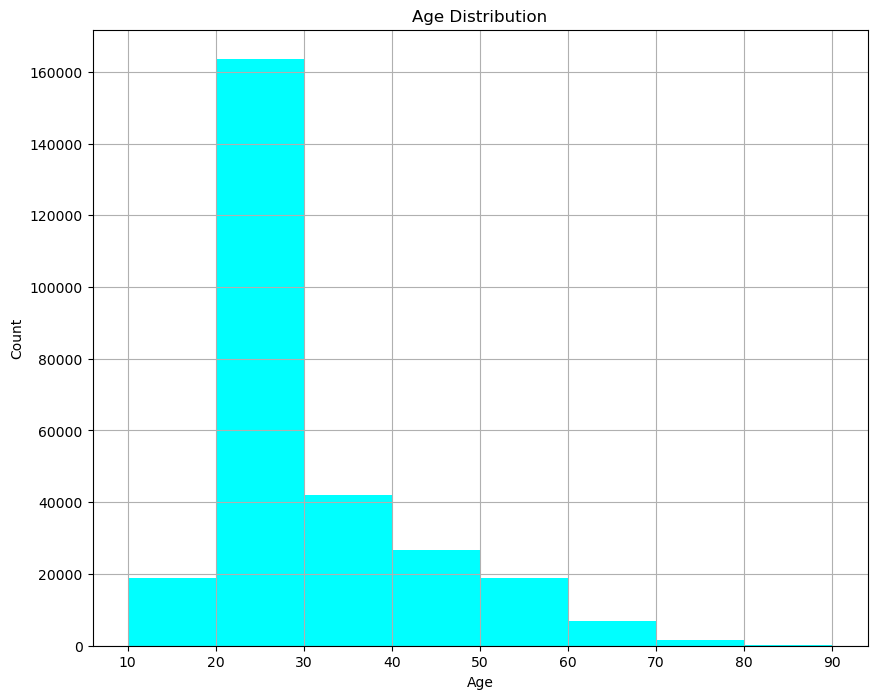

In [50]:
plt.figure(figsize=(10,8))
users.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

    Most of the users are 20 - 30 years old which represents the youth

## 3. Ratings Dataset

In [51]:
explicit_rating=ratings[ratings['Book-Rating'] != 0]

In [52]:
# Merging  all three datasets
# for the rating dataset, we are only taking the explicit rating dataset

df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')

In [53]:
# shape of the merged dataframe 'df'

df.shape

(383842, 12)

In [54]:
# displaying the top 3 rows of df

df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,"timmins, ontario, canada",24
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,"timmins, ontario, canada",24
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,"timmins, ontario, canada",24


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 383842 non-null  object
 1   Book-Title           383842 non-null  object
 2   Book-Author          383842 non-null  object
 3   Year-Of-Publication  383842 non-null  int32 
 4   Publisher            383842 non-null  object
 5   Image-URL-S          383842 non-null  object
 6   Image-URL-M          383842 non-null  object
 7   Image-URL-L          383842 non-null  object
 8   User-ID              383842 non-null  int64 
 9   Book-Rating          383842 non-null  int64 
 10  Location             383842 non-null  object
 11  Age                  383842 non-null  int32 
dtypes: int32(2), int64(2), object(8)
memory usage: 35.1+ MB


### Analysis No. 5 - Rating distribution

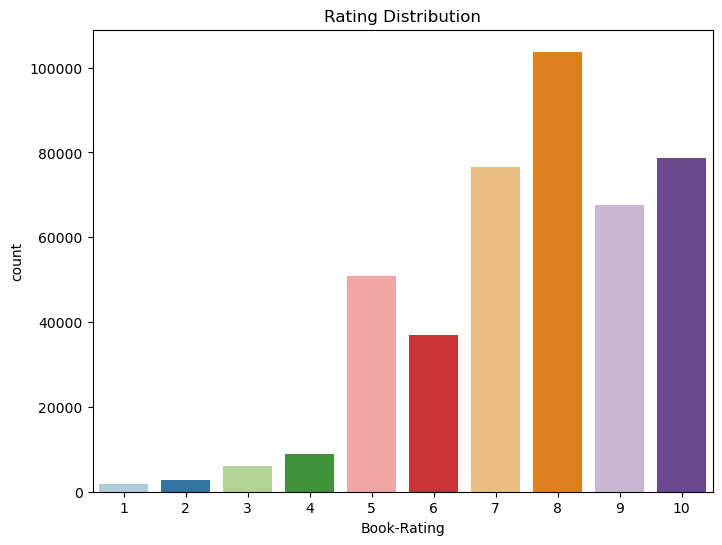

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating",palette = 'Paired',data = explicit_rating)
plt.title('Rating Distribution')
plt.show()

    Above countplot indicates that higher ratings are more common amongst users and rating 8 has been rated highest number  of times.

### Analysis No. 6 - Top 10 highest rated books

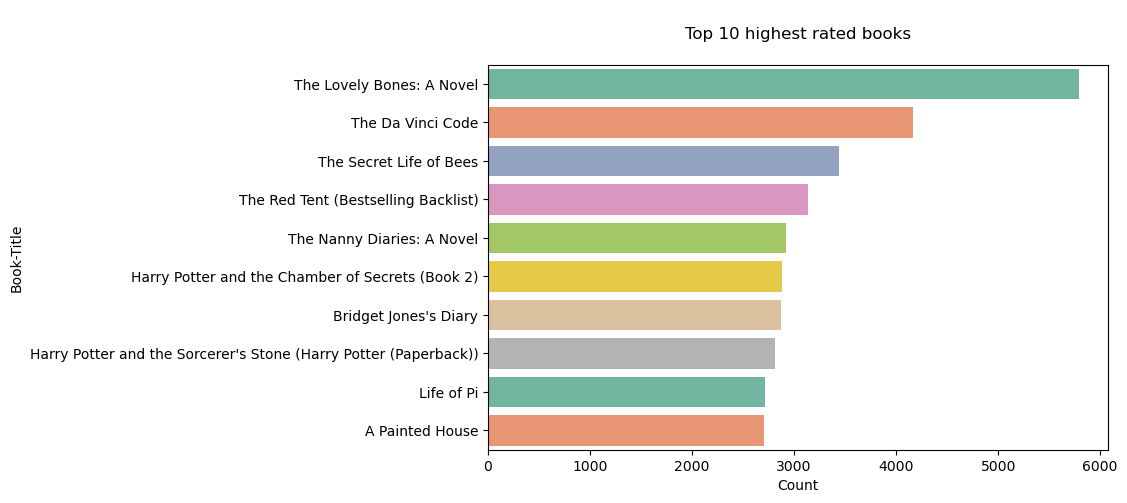

In [57]:
# top 10 highest rated books

popular = df.groupby('Book-Title')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.title('\nTop 10 highest rated books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')
plt.show()

    The book which has been rated by most number of users is 'The Lovely Bones'

### Analysis No. 7 - Top 10 highest rated authors

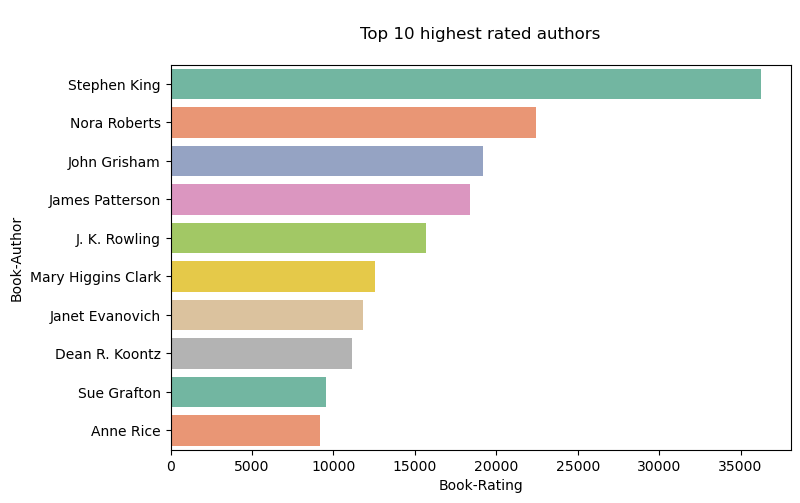

In [58]:
# Top 10 highest rated authors

author = df.groupby('Book-Author')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.title('\nTop 10 highest rated authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')     
plt.show()

    Top book author with respect to the number of ratings is Stephen King